# Project: Wrangling and Analyze Data

## Data Gathering

In [1]:
#import all libraries
import pandas as pd
import numpy as np
import os
import requests
import matplotlib.pyplot as plt
%matplotlib inline
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
from IPython import display
import seaborn as sns
sns.set_style('darkgrid')

In [2]:
df1 = pd.read_csv('twitter-archive-enhanced.csv')
df1.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


Here I used Requests library to download the tweet image prediction (image_predictions.tsv)

In [ ]:
#create image predictions folder if it does not exist
folder_name = 'image-predictions'
if not os.path.exists('folder_name'):
    os.makedirs(folder_name)

#use requests to download file
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open(os.path.join(folder_name, url.split('/')[-1]), mode ='wb') as file:
    file.write(response.content)

In [4]:
#read the downloaded file
df2 = pd.read_csv('image-predictions/image-predictions.tsv', sep='\t')
df2.head(20)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


Here I used Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [ ]:
# These keys are hidden to comply with Twitter's API terms and conditions
# consumer_key = 'HIDDEN'
# consumer_secret = 'HIDDEN'
# access_token = 'HIDDEN'
# access_secret = 'HIDDEN'

# auth = OAuthHandler(consumer_key, consumer_secret)
# auth.set_access_token(access_token, access_secret)

# api = tweepy.API(auth, wait_on_rate_limit=True)

# tweet_ids = df1.tweet_id.values
# len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
# count = 0
# fails_dict = {}
# start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
# with open('tweet_json.txt', 'w') as outfile:
#    for tweet_id in tweet_ids:
#        count += 1
#        print(str(count) + ": " + str(tweet_id))
#        try:
#            tweet = api.get_status(tweet_id, tweet_mode='extended')
#            print("Success")
#            json.dump(tweet._json, outfile)
#            outfile.write('\n')
#        except tweepy.TweepError as e:
#            print("Fail")
#            fails_dict[tweet_id] = e
#            pass
# end = timer()
# print(end - start)
# print(fails_dict)

In [5]:
#query Twitter API using Tweepy
tweets_list = []
with open('tweet_json.txt', 'r') as file:
    for line in file:
        tweets = json.loads(line)
        tweet_id = tweets['id']
        retweet_count = tweets['retweet_count']
        favorite_count = tweets['favorite_count']
        tweets_list.append({'tweet_id':tweet_id,'retweet_count':retweet_count, 'favorite_count':favorite_count})

In [6]:
df3 = pd.DataFrame(tweets_list,columns=['tweet_id','retweet_count','favorite_count'])
df3.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


## Assessing Data

In [7]:
#programmatic assessement: check infomation of df1
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [8]:
df1.shape

(2356, 17)

In [9]:
#confirm if df1 has duplicates
df1.duplicated().sum()

0

In [10]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [11]:
#number of rows where denominator is not 10.
len(df1.rating_denominator[df1.rating_denominator != 10])

23

By visual assessment, some names in the name column are obviously wrong. These names such as: this, a, an, the, his, all start with lowercase while the proper names start with uppercase. For proper cleaning, I will get all names starting with lowercase using the code below:

In [12]:
lowercase_names = df1[df1['name'].str.contains('^[a-z]')==True]
lowercase_names.name.value_counts()

a               55
the              8
an               7
very             5
quite            4
one              4
just             4
getting          2
mad              2
not              2
actually         2
light            1
old              1
officially       1
incredibly       1
space            1
his              1
this             1
my               1
infuriating      1
such             1
unacceptable     1
by               1
all              1
life             1
Name: name, dtype: int64

In [13]:
df2.shape

(2075, 12)

In [14]:
df2.duplicated().sum()

0

In [15]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [16]:
df3.shape

(2354, 3)

In [17]:
df3.duplicated().sum()

0

### Quality issues
1. Most of the rows in the in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id and retweeted status timestamp columns in df1 have null values.

2. The column names in df2 are not clear/easy to understand 

3. In df2, there's insconsistency in the first letters in colums p1, p2 and p3

4. Timestamp is in the wrong format - string instead of datetime.

5. In the name column of df1 some names are 'such','none','a','an','this','his','quite','the' these appear to be missing names and should be represented by NaN

6. From column p1, it is clear that not all the urls are images of dogs

7. Some rows have denominator less or more than 10. Some are retweets and while others have irregular ratings different from the text. 

8. The number of images per tweet img_num is not necessary for this analysis

### Tidiness issues
1. The dog stage - doggo, floofer, puppa and poppo - can be one column since one dog is at one stage at a time.

2. The text column has both text and url mixed in the sentence

## Cleaning Data

In [22]:
# Make copies of original pieces of data
df1_clean = df1.copy()
df2_clean = df2.copy()
df3_clean = df3.copy()

## Issue #1: 
Most of the rows in the in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id and retweeted status timestamp columns in df1 have null values.We are only interested in original tweets. 

#### Define:
Drop the columns listed above

#### Code

In [23]:
#list all columns headers of df1
list(df1_clean)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

In [24]:
#drop columns
df1_clean = df1_clean.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp','expanded_urls'], axis = 1)
df1_clean.info()                                
                                

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id              2356 non-null int64
timestamp             2356 non-null object
source                2356 non-null object
text                  2356 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  2356 non-null object
doggo                 2356 non-null object
floofer               2356 non-null object
pupper                2356 non-null object
puppo                 2356 non-null object
dtypes: int64(3), object(8)
memory usage: 202.5+ KB


#### Test


In [25]:
df1_clean.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,10,Franklin,None,None,None,None


## Issue #2:
The column names in df2 are not clear/easy to understand

#### Define
Rename columns p1,p2 and p3

#### Code

In [26]:
df2_clean = df2_clean.rename(columns={'p1':'img_prediction1','p2':'img_prediction2', 'p3':'img_prediction3'})

#### Test

In [27]:
df2_clean.head()

,tweet_id,jpg_url,img_num,img_prediction1,p1_conf,p1_dog,img_prediction2,p2_conf,p2_dog,img_prediction3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


## Issue #3:
 In df2, there's insconsistency in the first letters in colums p1, p2 and p3 

#### Define
Change all first letters to upper case

#### Code

In [28]:
df2_clean['img_prediction1'] = df2_clean['img_prediction1'].str.capitalize()
df2_clean['img_prediction2'] = df2_clean['img_prediction2'].str.capitalize()
df2_clean['img_prediction3'] = df2_clean['img_prediction3'].str.capitalize()

#### Test

In [29]:
df2_clean.head()

,tweet_id,jpg_url,img_num,img_prediction1,p1_conf,p1_dog,img_prediction2,p2_conf,p2_dog,img_prediction3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,Collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,Redbone,0.360687,True,Miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [30]:
df2_clean.sample()

,tweet_id,jpg_url,img_num,img_prediction1,p1_conf,p1_dog,img_prediction2,p2_conf,p2_dog,img_prediction3,p3_conf,p3_dog
42,666739327293083650,https://pbs.twimg.com/media/CUC74aTWoAInZey.jpg,1,Miniature_poodle,0.546933,True,Cocker_spaniel,0.165255,True,Toy_poodle,0.095959,True


## Issue #4:
Timestamp is in the wrong format - string instead of datetime.

#### Define
Convert to datetime format

#### Code

In [31]:
df1_clean['timestamp'] = pd.to_datetime(df1_clean.timestamp)

#### Test

In [32]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id              2356 non-null int64
timestamp             2356 non-null datetime64[ns]
source                2356 non-null object
text                  2356 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  2356 non-null object
doggo                 2356 non-null object
floofer               2356 non-null object
pupper                2356 non-null object
puppo                 2356 non-null object
dtypes: datetime64[ns](1), int64(3), object(7)
memory usage: 202.5+ KB


## Issue #5:
In the name column of df1 some names are 'such','none','a','an','this','his','quite','the' these appear to be missing names and should be represented by NaN

#### Define
Replace missing names with NaN

#### Code

In [33]:
wrong_names = ['a','the','an','very','just','one','quite','not','getting','actually','mad','old','unacceptable',
               'all','life','this','incredibly','space','light','infuriating','by','officially','such','his','my',
               'None']

In [34]:
#replace these names with NaN
df1_clean.replace(to_replace = wrong_names, value = np.NaN, inplace=True)

#### Test

In [35]:
lowercase_names = df1_clean[df1_clean['name'].str.contains('^[a-z]')==True]
lowercase_names.name.value_counts()

Series([], Name: name, dtype: int64)

## Issue #6:
From column p1, it is clear that not all the urls are images of dogs

#### Define:
Remove rows that are not dogs 

From the table, by visual assessment for every image that is not a dog, the dog image prediction, p1_dog, is False. Therefore all rows where p1_dog is False will be removed.

#### Code

In [36]:
df2_clean['p1_dog'].value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [37]:
#get the index of rows with p1_dog as false
index_false = df2_clean[df2_clean['p1_dog']==False].index
print(index_false)

Int64Index([   6,    8,   17,   18,   21,   22,   25,   29,   33,   43,
            ...
            1992, 2012, 2013, 2021, 2022, 2026, 2046, 2052, 2071, 2074],
           dtype='int64', length=543)


In [38]:
df2_clean.drop(index_false, inplace = True)

#### Test

In [39]:
df2_clean.shape

(1532, 12)

In [40]:
df2_clean.sample(10)

,tweet_id,jpg_url,img_num,img_prediction1,p1_conf,p1_dog,img_prediction2,p2_conf,p2_dog,img_prediction3,p3_conf,p3_dog
57,667073648344346624,https://pbs.twimg.com/media/CUHr8WbWEAEBPgf.jpg,1,Chihuahua,0.483682,True,Pug,0.092494,True,Brabancon_griffon,0.057495,True
1908,852672615818899456,https://pbs.twimg.com/media/C9VNNp1XkAEWRFb.jpg,1,Golden_retriever,0.711235,True,Otterhound,0.068235,True,Sussex_spaniel,0.046562,True
1126,727524757080539137,https://pbs.twimg.com/media/Chiv6BAW4AAiQvH.jpg,2,Pomeranian,0.958834,True,Chihuahua,0.024099,True,Chow,0.003941,True
1598,799297110730567681,https://pbs.twimg.com/media/CxeseRgUoAM_SQK.jpg,1,Malamute,0.985028,True,Siberian_husky,0.005834,True,Eskimo_dog,0.005443,True
1304,753294487569522689,https://pbs.twimg.com/media/CnQ9Vq1WEAEYP01.jpg,1,Chow,0.194773,True,Monitor,0.102305,False,Siberian_husky,0.086855,True
70,667192066997374976,https://pbs.twimg.com/media/CUJXpRBXIAAN0yz.jpg,1,Rottweiler,0.283640,True,Miniature_pinscher,0.148112,True,Black-and-tan_coonhound,0.095585,True
1426,772581559778025472,https://pbs.twimg.com/media/CrjC0JAWAAAjz6n.jpg,3,Newfoundland,0.574345,True,Border_collie,0.128352,True,Saint_bernard,0.059476,True
1306,753398408988139520,https://pbs.twimg.com/ext_tw_video_thumb/75339...,1,Whippet,0.163794,True,Italian_greyhound,0.157192,True,English_foxhound,0.142995,True
2034,883838122936631299,https://pbs.twimg.com/media/DEQGFgAXUAAEvfi.jpg,1,Doberman,0.610946,True,Miniature_pinscher,0.299603,True,Kelpie,0.063020,True
1964,867072653475098625,https://pbs.twimg.com/media/DAElHfmUMAEH9lB.jpg,1,Blenheim_spaniel,0.352946,True,Papillon,0.211766,True,Pekinese,0.112952,True


## Issue #7:
Some rows have denominator less or more than 10. 
Some are retweets and while others have irregular ratings different from the text.  

#### Define
This Issue is divided into two parts, for this section the ratings were wrong and the correct values were included in the text so that would be corrected below 

#### Code

In [42]:
list(df1_clean)

['tweet_id',
 'timestamp',
 'source',
 'text',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

In [43]:
df1_clean.iloc[[313,1068,1165,1202,1662,2335,763,1689,1712] , [0,3,4,5]]

,tweet_id,text,rating_numerator,rating_denominator
313,835246439529840640,@jonnysun @Lin_Manuel ok jomny I know you're e...,960,0
1068,740373189193256964,"After so many requests, this is Bretagne. She ...",9,11
1165,722974582966214656,Happy 4/20 from the squad! 13/10 for all https...,4,20
1202,716439118184652801,This is Bluebert. He just saw that both #Final...,50,50
1662,682962037429899265,This is Darrel. He just robbed a 7/11 and is i...,7,11
2335,666287406224695296,This is an Albanian 3 1/2 legged Episcopalian...,1,2
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. ...,27,10
1689,681340665377193984,I've been told there's a slight possibility he...,5,10
1712,680494726643068929,Here we have uncovered an entire battalion of ...,26,10


In [44]:
df1_clean.iloc[313, 4] = 13
df1_clean.iloc[313, 5] = 10

df1_clean.iloc[763, 4] = 11.27
df1_clean.iloc[763, 5] = 10

df1_clean.iloc[1068, 4] = 14
df1_clean.iloc[1068, 5] = 10

df1_clean.iloc[1165, 4] = 13
df1_clean.iloc[1165, 5] = 10

df1_clean.iloc[1202, 4] = 11
df1_clean.iloc[1202, 5] = 10

df1_clean.iloc[1662, 4] = 10
df1_clean.iloc[1662, 5] = 10

df1_clean.iloc[1689, 4] = 9.5
df1_clean.iloc[1689, 5] = 10

df1_clean.iloc[1712, 4] = 11.26
df1_clean.iloc[1712, 5] = 10

df1_clean.iloc[2335, 4] = 9
df1_clean.iloc[2335, 5] = 10

#### Test

In [45]:
df1_clean.iloc[[313,1068,1165,1202,1662,2335,763,1689,1712] , [0,3,4,5]]

,tweet_id,text,rating_numerator,rating_denominator
313,835246439529840640,@jonnysun @Lin_Manuel ok jomny I know you're e...,13.00,10
1068,740373189193256964,"After so many requests, this is Bretagne. She ...",14.00,10
1165,722974582966214656,Happy 4/20 from the squad! 13/10 for all https...,13.00,10
1202,716439118184652801,This is Bluebert. He just saw that both #Final...,11.00,10
1662,682962037429899265,This is Darrel. He just robbed a 7/11 and is i...,10.00,10
2335,666287406224695296,This is an Albanian 3 1/2 legged Episcopalian...,9.00,10
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. ...,11.27,10
1689,681340665377193984,I've been told there's a slight possibility he...,9.50,10
1712,680494726643068929,Here we have uncovered an entire battalion of ...,11.26,10


The second part involves the tweets which have RT in the text showing they are retweets and those with wrong ratings that don't have the correct ratings in the text. 
### Retweets will be dropped and also tweets with wrong ratings.

#### Code

In [46]:
#select indexes of affected rows and display them
df1_clean.iloc[[19, 32, 36, 68, 73, 74, 78, 91, 95, 97, 101, 109, 118, 130, 132, 146, 159, 160,
                165, 171, 180, 182, 204, 211, 212, 230, 231, 247, 250, 260, 272, 273, 
                285, 286, 290, 315, 340, 342, 357, 359, 366, 382, 386, 397, 399, 433, 516, 594, 
                595, 596, 597, 598, 599, 600, 601, 602, 603, 604, 605, 606, 615, 654, 655, 666, 
                692, 694, 702, 720, 764, 778, 784, 829, 833, 841, 860, 868, 872, 885, 902, 908, 
                911, 937, 943, 949, 1023, 1120, 1228, 1254, 1274, 1351, 1433, 1598, 1634, 1635, 
                1663, 1779,  ] , [0,3,4,5]]

,tweet_id,text,rating_numerator,rating_denominator
19,888202515573088257,RT @dog_rates: This is Canela. She attempted s...,13.0,10
32,886054160059072513,RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,12.0,10
36,885311592912609280,RT @dog_rates: This is Lilly. She just paralle...,13.0,10
68,879130579576475649,RT @dog_rates: This is Emmy. She was adopted t...,14.0,10
73,878404777348136964,RT @dog_rates: Meet Shadow. In an attempt to r...,13.0,10
74,878316110768087041,RT @dog_rates: Meet Terrance. He's being yelle...,11.0,10
78,877611172832227328,RT @rachel2195: @dog_rates the boyfriend and h...,14.0,10
91,874434818259525634,RT @dog_rates: This is Coco. At first I though...,12.0,10
95,873697596434513921,RT @dog_rates: This is Walter. He won't start ...,14.0,10
97,873337748698140672,RT @dog_rates: This is Sierra. She's one preci...,12.0,10


In [47]:
#drop these rows
df1_clean.drop([19, 32, 36, 68, 73, 74, 78, 91, 95, 97, 101, 109, 118, 130, 132, 146, 159, 160,
                165, 171, 180, 182, 204, 211, 212, 230, 231, 247, 250, 260, 272, 273, 
                285, 286, 290, 315, 340, 342, 357, 359, 366, 382, 386, 397, 399, 433, 516, 594, 
                595, 596, 597, 598, 599, 600, 601, 602, 603, 604, 605, 606, 615, 654, 655, 666, 
                692, 694, 702, 720, 764, 778, 784, 829, 833, 841, 860, 868, 872, 885, 902, 908, 
                911, 937, 943, 949, 1023, 1120, 1228, 1254, 1274, 1351, 1433, 1598, 1634, 1635, 
                1663, 1779], inplace = True)

#### Test

In [48]:
df1_clean.shape

(2260, 11)

In [77]:
# This sample is displayed to confirm the rows above have been dropped
df1_clean.sample(30)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage
1560,688519176466644993,2016-01-17 00:32:18,"<a href=""http://twitter.com/download/iphone"" r...",This pupper is sprouting a flower out of her h...,12.0,10,NaN,NaN
2023,671896809300709376,2015-12-02 03:40:57,"<a href=""http://twitter.com/download/iphone"" r...",This is Lola. She fell asleep on a piece of pi...,10.0,10,Lola,NaN
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12.0,10,Archie,NaN
460,817777686764523521,2017-01-07 16:59:28,"<a href=""http://twitter.com/download/iphone"" r...","This is Dido. She's playing the lead role in ""...",13.0,10,Dido,NaN
1048,743253157753532416,2016-06-16 01:25:36,"<a href=""http://twitter.com/download/iphone"" r...",This is Kilo. He cannot reach the snackum. Nif...,10.0,10,Kilo,NaN
1564,688116655151435777,2016-01-15 21:52:49,"<a href=""http://twitter.com/download/iphone"" r...",Please send dogs. I'm tired of seeing other st...,10.0,10,NaN,NaN
1696,681242418453299201,2015-12-27 22:37:04,"<a href=""http://twitter.com/download/iphone"" r...",This is Champ. He's being sacrificed to the Az...,10.0,10,Champ,NaN
2080,670823764196741120,2015-11-29 04:37:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Remington. He's a man dime. 12/10,12.0,10,Remington,NaN
1578,687317306314240000,2016-01-13 16:56:30,"<a href=""http://twitter.com/download/iphone"" r...",This is Tyrone. He's a leaf wizard. Self-motiv...,11.0,10,Tyrone,NaN
676,789314372632018944,2016-10-21 03:56:25,"<a href=""http://twitter.com/download/iphone"" r...",HE WAS JUST A LIL SLEEPY FROM BEING SUCH A GOO...,13.0,10,NaN,NaN


In [78]:
# Here the first rows are displayed to show that the rows 19 and 32 were indeed dropped
df1_clean.head(33)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13.0,10,Phineas,NaN
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13.0,10,Tilly,NaN
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12.0,10,Archie,NaN
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13.0,10,Darla,NaN
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12.0,10,Franklin,NaN
5,891087950875897856,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,13.0,10,NaN,NaN
6,890971913173991426,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,13.0,10,Jax,NaN
7,890729181411237888,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,13.0,10,NaN,NaN
8,890609185150312448,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,13.0,10,Zoey,NaN
9,890240255349198849,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,14.0,10,Cassie,NaN


## Issue #8:
The number of images per tweet img_num is not necessary for this analysis

#### Define
Drop the img_num column

#### Code

In [51]:
df2_clean.drop('img_num', axis = 1, inplace=True)

#### Test

In [52]:
df2_clean.head()

,tweet_id,jpg_url,img_prediction1,p1_conf,p1_dog,img_prediction2,p2_conf,p2_dog,img_prediction3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel,0.465074,True,Collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,Redbone,0.506826,True,Miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback,0.408143,True,Redbone,0.360687,True,Miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,Miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


#### Test

In [53]:
df1_clean[df1_clean['name'].str.contains('^[a-z]')==True]

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


# Tidiness issues

## Issue #9:
 The dog stage - doggo, floofer, pupper and puppo - can be one column since one dog is at one stage at a time.

#### Define
Join the doggo, floofer, pupper and puppo columns into one column named dog_stage

#### Code


In [54]:
dog_stage = np.repeat('', df1_clean.shape[0])

In [55]:
#create new column - dog_stage
df1_clean['dog_stage'] = dog_stage

In [56]:
#replace all none values
df1_clean['doggo'].replace('None','', inplace = True)
df1_clean['floofer'].replace('None','', inplace = True)
df1_clean['pupper'].replace('None','', inplace = True)
df1_clean['puppo'].replace('None','', inplace = True)

In [57]:
#join the doggo, floofer, puppa and puppo columns to dog_stage column
df1_clean['dog_stage'] = df1_clean['doggo'] + df1_clean['floofer'] + df1_clean['pupper'] + df1_clean['puppo']

In [58]:
#replace all None with NaN
df1_clean['dog_stage'].replace('', np.nan, inplace = True)

In [59]:
#drop the doggo, floofer, pupper and puppo columns
df1_clean = df1_clean.drop(['doggo','floofer','pupper','puppo'], axis = 1)

#### Test

In [60]:
df1_clean.sample(5)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage
1346,704480331685040129,2016-03-01 01:36:14,"<a href=""http://twitter.com/download/iphone"" r...",Meet Lucia. She's a Cumulonimbus Floofmallow. ...,11.0,10,Lucia,NaN
997,748324050481647620,2016-06-30 01:15:31,"<a href=""http://twitter.com/download/iphone"" r...",This is Duke. He permanently looks like he jus...,11.0,10,Duke,NaN
2180,669000397445533696,2015-11-24 03:51:38,"<a href=""http://twitter.com/download/iphone"" r...",Meet Terrance. He's being yelled at because he...,11.0,10,Terrance,NaN
1297,707776935007539200,2016-03-10 03:55:45,"<a href=""http://twitter.com/download/iphone"" r...",This is Sadie. She's a Bohemian Rhapsody. Rema...,11.0,10,Sadie,NaN
2028,671866342182637568,2015-12-02 01:39:53,"<a href=""http://twitter.com/download/iphone"" r...",Meet Dylan. He can use a fork but clearly can'...,10.0,10,Dylan,NaN


## Issue #10:
The text column has both text and url mixed in the sentence

#### Define
Split the text and create a new column for the urls

#### Code

In [61]:
#remove urls from text column
df1_clean['text'] = df1_clean.text.str.replace('(https\S+)','').str.strip()

In [ ]:
#drop url and text_url columns. I created them in error
df1_clean = df1_clean.drop(['url','text_url'], axis = 1)

#### Test

In [79]:
df1_clean.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13.0,10,Phineas,NaN
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13.0,10,Tilly,NaN
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12.0,10,Archie,NaN
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13.0,10,Darla,NaN
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12.0,10,Franklin,NaN


## Storing Data

In [80]:
#merge the three files
df = pd.merge(df1_clean, df3_clean, on=['tweet_id'], how = 'left')

In [81]:
list(df)

['tweet_id',
 'timestamp',
 'source',
 'text',
 'rating_numerator',
 'rating_denominator',
 'name',
 'dog_stage',
 'retweet_count',
 'favorite_count']

In [82]:
#save as csv file
df.to_csv('twitter_archive_master.csv', index = False)

## Analyzing and Visualizing Data


In [83]:
#Read merged data into dataframe
twitter_archive_master = pd.read_csv('twitter_archive_master.csv')

In [84]:
twitter_archive_master.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13.0,10,Phineas,NaN,8853.0,39467.0
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13.0,10,Tilly,NaN,6514.0,33819.0
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12.0,10,Archie,NaN,4328.0,25461.0
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13.0,10,Darla,NaN,8964.0,42908.0
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12.0,10,Franklin,NaN,9774.0,41048.0


In [85]:
#Make a copy of the master file for this analysis
df_dogs = twitter_archive_master.copy()

### Questions:
1. Which tweet had the highest retweets and favourite count?

2. Which dog has the highest rating?

3. Which dog has the lowest rating?

4. What is the correlation between retweet count and favourite count?

## Question 1
Which tweet had the highest favourite count?

In [86]:
df_dogs[df_dogs['favorite_count']==df_dogs['favorite_count'].max()]

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count
368,822872901745569793,2017-01-21 18:26:02,"<a href=""http://twitter.com/download/iphone"" r...",Here's a super supportive puppo participating ...,13.0,10,NaN,NaN,48265.0,132810.0


The tweet with the highest favourite count is tweet_id 822872901745569793. He's a puppo with dog rating 13/10

## Question 2
Which dog has the highest rating?

In [87]:
df_dogs[df_dogs['rating_numerator'] == df_dogs['rating_numerator'].max()]

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count
895,749981277374128128,2016-07-04 15:00:45,"<a href=""https://about.twitter.com/products/tw...",This is Atticus. He's quite simply America af....,1776.0,10,Atticus,NaN,2772.0,5569.0


The dog with the highest rating is named Atticus. He has a rating of 1776/10

## Question 3
Which dog has the lowest rating?

In [88]:
df_dogs[df_dogs['rating_numerator'] == df_dogs['rating_numerator'].min()]

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count
932,746906459439529985,2016-06-26 03:22:31,"<a href=""http://twitter.com/download/iphone"" r...","PUPDATE: can't see any. Even if I could, I cou...",0.0,10,NaN,NaN,336.0,3168.0


The dog with tweet_id 746906459439529985 has the lowest ratings of 0/10. Further investigation of the tweets shows that it is a vague tweet about dogs in general.

## Question 4
What is the correlation between retweets and favourite counts

Text(0,0.5,'Favourites')

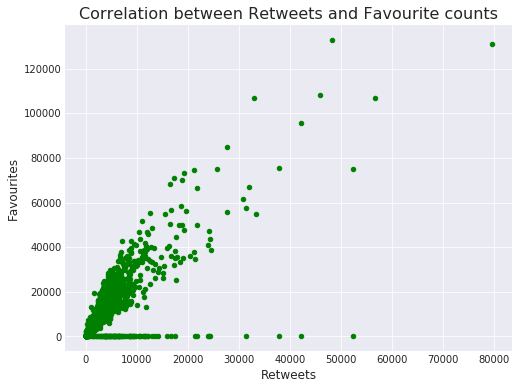

In [89]:
df_dogs.plot(x = 'retweet_count', y = 'favorite_count', kind = 'scatter', figsize = (8,6), color = "g")
plt.title('Correlation between Retweets and Favourite counts', fontsize=16)
plt.xlabel('Retweets', fontsize = 12)
plt.ylabel('Favourites', fontsize = 12)

There is a positive correlation between retweets and likes

### Visualization

(array([   0.,   20.,   40.,   60.,   80.,  100.,  120.,  140.,  160.]),
 <a list of 9 Text xticklabel objects>)

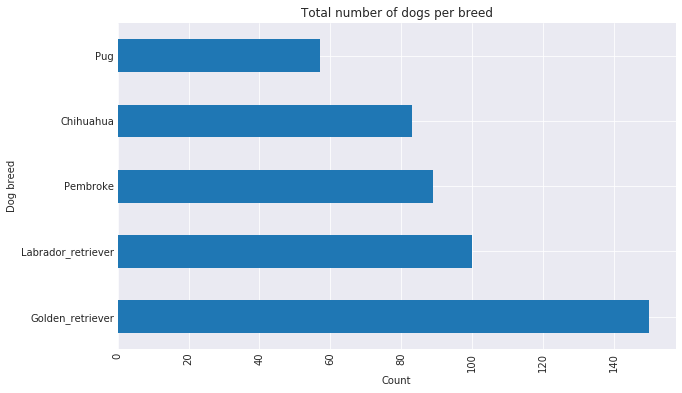

In [90]:
#Display the top 5 dogs in a bar chart
base_color = sns.color_palette()[0]
df2_clean.groupby('img_prediction1')['tweet_id'].count().sort_values(ascending = False).head().plot(kind='barh', color = base_color, figsize=(10,6));
plt.xlabel('Count')
plt.ylabel('Dog breed')
plt.title('Total number of dogs per breed')
plt.xticks(rotation = 90)

In [91]:
colors = ['orange', 'moccasin', 'moccasin', 'moccasin', 'moccasin']

Text(0,0.5,'Favorite count')

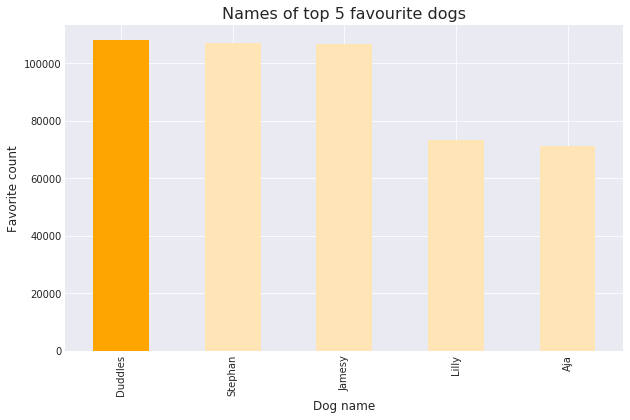

In [92]:
df_dogs.groupby('name')['favorite_count'].mean().sort_values(ascending=False).head().plot(kind='bar', color=colors, figsize=(10,6))
plt.title('Names of top 5 favourite dogs', fontsize=16)
plt.xlabel('Dog name', fontsize = 12)
plt.ylabel('Favorite count', fontsize = 12)


### Insights:
1. The tweet with the highest favourite count is tweet_id 822872901745569793. He's a puppo with dog rating 13/10

2. The dog with the highest rating is named Atticus. He has a rating of 1776/10

3. The dog with tweet_id 746906459439529985 has the lowest rating of 0/10. Further investigation of the tweet shows that it is a vague tweet about dogs in general.

4. There is a positive correlation between retweets and likes